In [1]:
import qiskit_nature
from rdkit import Chem
from pathlib import Path 
import rdkit

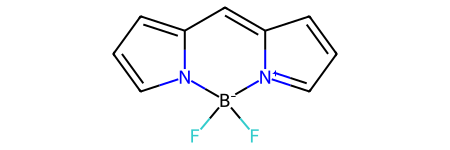

In [2]:
#smile='C1=CSC=N1'
smile = '[B-]1(n2cccc2C=C3[N+]1=CC=C3)(F)F'
smi_key='BODIPY'
mol_rdkit = Chem.MolFromSmiles(smile)
mol_rdkit

In [3]:
 import py3Dmol 

In [4]:
 # Verify if the "data2402_{smi_key}" subdirectory exist and if not, create it
working_dir = Path(f'./data2405/{smi_key}')
# Create the output directory if it doesn't exist
working_dir.mkdir(parents=True, exist_ok=True)


In [5]:

def view3D(mol, label, fmt='mol'):
        """3D vizualisation of mol/xyz file with Py3DMol
        """

        view = py3Dmol.view(width=400, height=400)       # visualiser la molécule avec une largeur de ''400'' et hauteur de ''400''

        if fmt=='mol':                                   # si le format des 'mol',
            view.addModel(Chem.MolToMolBlock(mol), fmt)     # generer les coordonnes de a molecule dans un block
            # view.addModel(mol, fmt)
        elif fmt=='xyz':                                      # sinon 
            view.addModel(mol, fmt)                             # generer les coordonnes en xyz

        view.setStyle({'stick': {}, 'sphere': {'scale': .30}})     # définir le style de représentation de la molécule, avec des bâtons pour les liaisons et des sphères pour les atomes avec une échelle de '30'
        view.addLabel(label, {'position': {'x': -2, 'y': -3, 'z': 0}}) # ajouter une etiquette de visualisation dont les coordonnées sont x,y,z

        view.zoomTo()
        view.show()

Meilleur conformere

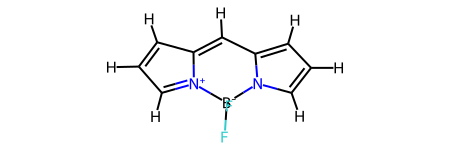

In [6]:
from rdkit.Chem import AllChem

# Add explicit Hs
mol_rdkit = Chem.AddHs(mol_rdkit)    #   Ajouter les atomes d'hydrogene a la molécule

# Generates the initial 3D conformation of the molecule
AllChem.EmbedMolecule(mol_rdkit)
mol_rdkit

Visualisation 3D

In [7]:
# 3D visualization
mol_rdkit0 = mol_rdkit                    #crée une nouvelle variable mol_rdkit0 qui est une copie de mol_rdkit.
                                           #Cette copie est nécessaire pour la visualisation 3D, car la fonction view3D() modifie l'objet molécule passé en argument.

view3D(mol_rdkit0, f'{smi_key} RDKit Molecule')


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [8]:
# Convert RDKit molecule to XYZ format 
mol_xyz0 = Chem.MolToXYZBlock(mol_rdkit)    # Convertir  la molecule format XYZ 
print(mol_xyz0)

21

B      0.077540   -1.260063    0.662168
N      1.287298   -0.512080    0.167762
C      2.610063   -0.872251    0.256071
C      3.376476    0.106602   -0.326730
C      2.477341    1.052924   -0.761252
C      1.191909    0.660042   -0.450475
C     -0.110072    1.302633   -0.691166
C     -1.226323    0.718760   -0.291707
N     -1.210933   -0.517100    0.366848
C     -2.465701   -0.871538    0.654737
C     -3.367151    0.157580    0.176219
C     -2.649449    1.109206   -0.388242
F      0.167736   -1.384240    2.127318
F     -0.008884   -2.602113    0.071666
H      2.928855   -1.787844    0.719808
H      4.459867    0.107265   -0.412239
H      2.746806    1.974054   -1.274174
H     -0.159997    2.257776   -1.197146
H     -2.712431   -1.798886    1.169208
H     -4.447832    0.134476    0.273536
H     -2.965119    2.024799   -0.852211



Préoptimisation avec RDKIT \
visualisation 3D

In [9]:
from rdkit.Chem import AllChem

# Optimizes the 3D conformation of the molecule using MMFF - Merck Molecular Force Field
AllChem.MMFFOptimizeMolecule(mol_rdkit, maxIters=200, mmffVariant="MMFF94s")   # utiliser 200 itérations et la variante MMFF94s

#Canonicalize the orientation of the conformation
Chem.rdMolTransforms.CanonicalizeMol(mol_rdkit, normalizeCovar=True, ignoreHs=False)

# 3D visualization
mol_rdkit1 = mol_rdkit
view3D(mol_rdkit1, f'{smi_key} RDKit Molecule MMFF94')


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [10]:
# Convert RDKit molecule to XYZ format 
mol_xyz1 = Chem.MolToXYZBlock(mol_rdkit)    # Convertir  la molecule format XYZ 
# Remove the first two lines (number of atoms and empty line) from XYZ data
mol_xyz1 = '\n'.join(mol_xyz0.strip().split('\n')[2:]) 
# Check that the xyz file is valide for the next step (pyscf.gto)
print(mol_xyz1)

B      0.077540   -1.260063    0.662168
N      1.287298   -0.512080    0.167762
C      2.610063   -0.872251    0.256071
C      3.376476    0.106602   -0.326730
C      2.477341    1.052924   -0.761252
C      1.191909    0.660042   -0.450475
C     -0.110072    1.302633   -0.691166
C     -1.226323    0.718760   -0.291707
N     -1.210933   -0.517100    0.366848
C     -2.465701   -0.871538    0.654737
C     -3.367151    0.157580    0.176219
C     -2.649449    1.109206   -0.388242
F      0.167736   -1.384240    2.127318
F     -0.008884   -2.602113    0.071666
H      2.928855   -1.787844    0.719808
H      4.459867    0.107265   -0.412239
H      2.746806    1.974054   -1.274174
H     -0.159997    2.257776   -1.197146
H     -2.712431   -1.798886    1.169208
H     -4.447832    0.134476    0.273536
H     -2.965119    2.024799   -0.852211


In [13]:
from tangelo import SecondQuantizedMolecule as SQMol
from tangelo.helpers.utils import is_package_installed

Creation de l'objet mole

In [14]:
thiazole_321g = SQMol(mol_xyz1, q=0, spin=0, basis="3-21g")
print(f"active molecular orbitals : {thiazole_321g.n_active_mos} ")
print(f"active electrons : {thiazole_321g.n_active_electrons} ")

# objet mol pour l'etat triplet
thiazole_321g_t = SQMol(mol_xyz1, q=0, spin=2, basis="3-21g")
print(f"active molecular orbitals triplet : {thiazole_321g_t.n_active_mos} ")
print(f"active electrons triplet: {thiazole_321g_t.n_active_electrons} ")

active molecular orbitals : 126 
active electrons : 70 
active molecular orbitals triplet : 126 
active electrons triplet: 70 


In [15]:
import dftd4.pyscf as disp
from pyscf import solvent


mf = thiazole_321g.mean_field
# Utiliser la méthode "ddCOSMO" de l'objet "solvent"
mf = mf.run().ddCOSMO()
mf.with_solvent.eps = 2.3741   # Toluene
mf = disp.energy(mf).run()


mf_t = thiazole_321g_t.mean_field
mf_t = mf_t.run().ddCOSMO()
mf_t.with_solvent.eps = 2.3741   # Toluene
mf_t = disp.energy(mf_t).run()

In [14]:
#mf.analyze(verbose=5)
#mf_t.analyse(verbose=5)

In [16]:
n_lumo = thiazole_321g.mo_occ.tolist().index(0.)
n_homo = n_lumo - 1
print(f"indice homo : {n_homo} ")
print(f" indice lumo: {n_lumo} ")

n_molecular_orb = thiazole_321g.n_mos
print(f'le nombre orbitales moleculaire est :{n_molecular_orb}')



#indices homo et lumo triplet
n_lumo_t = thiazole_321g_t.mo_occ.tolist().index(0.)
n_homo_t = n_lumo_t - 1
print(f"indice homo triplet : {n_homo_t} ")
print(f" indice lumo triplet: {n_lumo_t} ")

n_molecular_orb_t = thiazole_321g_t.n_mos
print(f'le nombre orbitales moleculaire triplet est :{n_molecular_orb_t}')


indice homo : 48 
 indice lumo: 49 
le nombre orbitales moleculaire est :140
indice homo triplet : 49 
 indice lumo triplet: 50 
le nombre orbitales moleculaire triplet est :140


Hamiltonien

In [17]:
from tangelo.toolboxes.molecular_computation.frozen_orbitals import get_orbitals_excluding_homo_lumo

# Selecting HOMO to LUMO orbitals.
frozen = get_orbitals_excluding_homo_lumo(thiazole_321g, homo_minus_n=0, lumo_plus_n=0)

thiazole_321g_frozen = SQMol(mol_xyz1, q=0, spin=0,
                                            basis="3-21g",
                                            frozen_orbitals=frozen)
print(f"{thiazole_321g_frozen.n_active_mos} active molecular orbitals")
print(f"{thiazole_321g_frozen.n_active_electrons} active electrons")



# Selecting HOMO to LUMO orbitals.
frozen_t = get_orbitals_excluding_homo_lumo(thiazole_321g, homo_minus_n=0, lumo_plus_n=0)

thiazole_321g_frozen_t = SQMol(mol_xyz1, q=0, spin=2,
                                            basis="3-21g",
                                            frozen_orbitals=frozen_t)
print(f"{thiazole_321g_frozen_t.n_active_mos} active molecular orbitals triplet")
print(f"{thiazole_321g_frozen_t.n_active_electrons} active electrons triplet")

2 active molecular orbitals
2 active electrons
2 active molecular orbitals triplet
2 active electrons triplet


In [18]:
from tangelo.toolboxes.qubit_mappings.mapping_transform import fermion_to_qubit_mapping
from tangelo.toolboxes.operators import count_qubits
from tangelo.toolboxes.operators.taper_qubits import QubitTapering

#singulet
hamiltonian = fermion_to_qubit_mapping(thiazole_321g_frozen.fermionic_hamiltonian, "JW")
n_qubits = count_qubits(hamiltonian)
taper = QubitTapering(hamiltonian, n_qubits,
                      n_electrons=thiazole_321g_frozen.n_active_electrons)
hamiltonian_taper = taper.z2_tapered_op
n_qubits_tapered = count_qubits(hamiltonian_taper)

print(f"Number of qubits: {n_qubits}")
print(f"Number of qubits after tapering: {n_qubits_tapered}")
print(f"{n_qubits - n_qubits_tapered} Z2 symmetries detected")


# triplet
hamiltonian_t = fermion_to_qubit_mapping(thiazole_321g_frozen_t.fermionic_hamiltonian, "JW")
n_qubits_t = count_qubits(hamiltonian_t)
taper_t = QubitTapering(hamiltonian_t, n_qubits_t,
                      n_electrons=thiazole_321g_frozen_t.n_active_electrons)
hamiltonian_taper_t = taper_t.z2_tapered_op
n_qubits_tapered_t = count_qubits(hamiltonian_taper_t)

print(f"Number of qubits triplet: {n_qubits}")
print(f"Number of qubits triplet after tapering: {n_qubits_tapered}")
print(f"{n_qubits_t - n_qubits_tapered_t} Z2 symmetries t detected")


: 

: 

Calcul vqe

In [18]:
from tangelo.algorithms.variational import VQESolver, BuiltInAnsatze
from tangelo.algorithms.classical import FCISolver

# Dictionary of resources for each algorithm
algorithm_resources = dict()

# Ground state energy calculation with VQE, reference values with FCI
vqe_options = {"molecule": thiazole_321g_frozen, "ansatz": BuiltInAnsatze.UCCSD}
vqe_solver = VQESolver(vqe_options)
vqe_solver.build()
vqe_energy = vqe_solver.simulate()
print("\n Ground Singlet state")
print(f"VQE energy = {vqe_energy}")
print(f"CASCI energy = {FCISolver(thiazole_321g_frozen).simulate()}")
algorithm_resources["vqe_ground_state"] = vqe_solver.get_resources()



# Dictionary of resources for each algorithm
algorithm_resources_t = dict()

# Ground state energy calculation with VQE, reference values with FCI
vqe_options_t = {"molecule": thiazole_321g_frozen_t, "ansatz": BuiltInAnsatze.UCCSD}
vqe_solver_t = VQESolver(vqe_options_t)
vqe_solver_t.build()
vqe_energy_t = vqe_solver_t.simulate()
print("\n Ground  state triplet")
print(f"VQE energy triplet = {vqe_energy_t}")
print(f"CASCI energy triplet = {FCISolver(thiazole_321g_frozen_t).simulate()}")
algorithm_resources_t["vqe_ground_state"] = vqe_solver_t.get_resources()


# First excited state energy calculation with VQE, reference values with FCI
# vqe_options = {"molecule": mol_Li2_t, "ansatz": BuiltInAnsatze.UpCCGSD}
# vqe_solver_t = VQESolver(vqe_options)
# vqe_solver_t.build()
# vqe_energy_t = vqe_solver_t.simulate()
# print("\n Lowest Triplet state")
# print(f"VQE energy = {vqe_energy_t}")
# print(f"CASCI energy = {FCISolver(mol_Li2_t).simulate()}")
# algorithm_resources["vqe_triplet_state"] = vqe_solver_t.get_resources()

KeyboardInterrupt: 